# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

In [2]:
import preliz as pz
import bambi as bmb
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

**Answer1**:

If we want to fit the data better and if overfitting isn't a big concern. If used in the right case they will fit the data better because they are more flexible.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

**Answer2**:

If overfitting matters to you, so predicting outside of dataset, then a polynomial-especially one with a high degree-would cause problems so you wouln't want to use it in this case. Also if it fits your data the same way a linear model fits your data then just use the linear one as you don't need to over-complex the model. 

**Task3**:

What's the point of using b splines?

**Answer3**:

B-splines make building smooth curves easier by splitting your data into segments and fitting a simple curve to each piece. Then, these curves are blended together to form one smooth line that captures the overall trend without overfitting. They are great because they have the flexibility of a polynomial regression, but without the overfitting of it. We can also adjust weights and spacing to fit our data better.


**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

**Answer4**:

A Gaussian Process is a method to determine where and how many knots should be placed in a model. It does this by treating every data point as a knot and examining their relationships using kernel/covariance and "closeness." It's like a neural network with infinite nodes, resulting in infinite connections between nodes and y-values that help you see relationships in the data.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


**Answer5**:

In [3]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


In [4]:
model_1 = bmb.Model("height ~ weight", howell)
idata_1 = model_1.fit()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, weight]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


In [5]:
model_4 = bmb.Model("height ~ poly(weight, degree=4)", howell)
idata_4 = model_4.fit()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, poly(weight, degree=4)]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.


c:\Users\ashwi\anaconda3\envs\jupyter\Lib\site-packages\arviz\rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
Default computed for conditional variable: weight


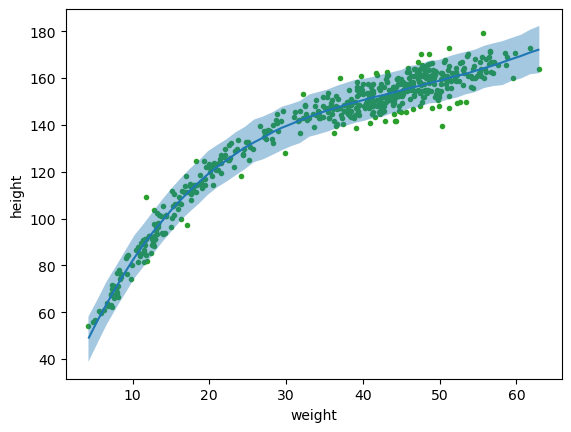

In [7]:
bmb.interpret.plot_predictions(model_4, idata_4, "weight", pps=True)
plt.plot(howell.weight, howell.height, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

**Answer6**:

One thing I learned is that Gaussian Processes can model uncertainty in your data by placing priors over the observation locations (in this case the observation dates). This lets the model account for measurement error, which is useful when the exact timing/location of the data is uncertain.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

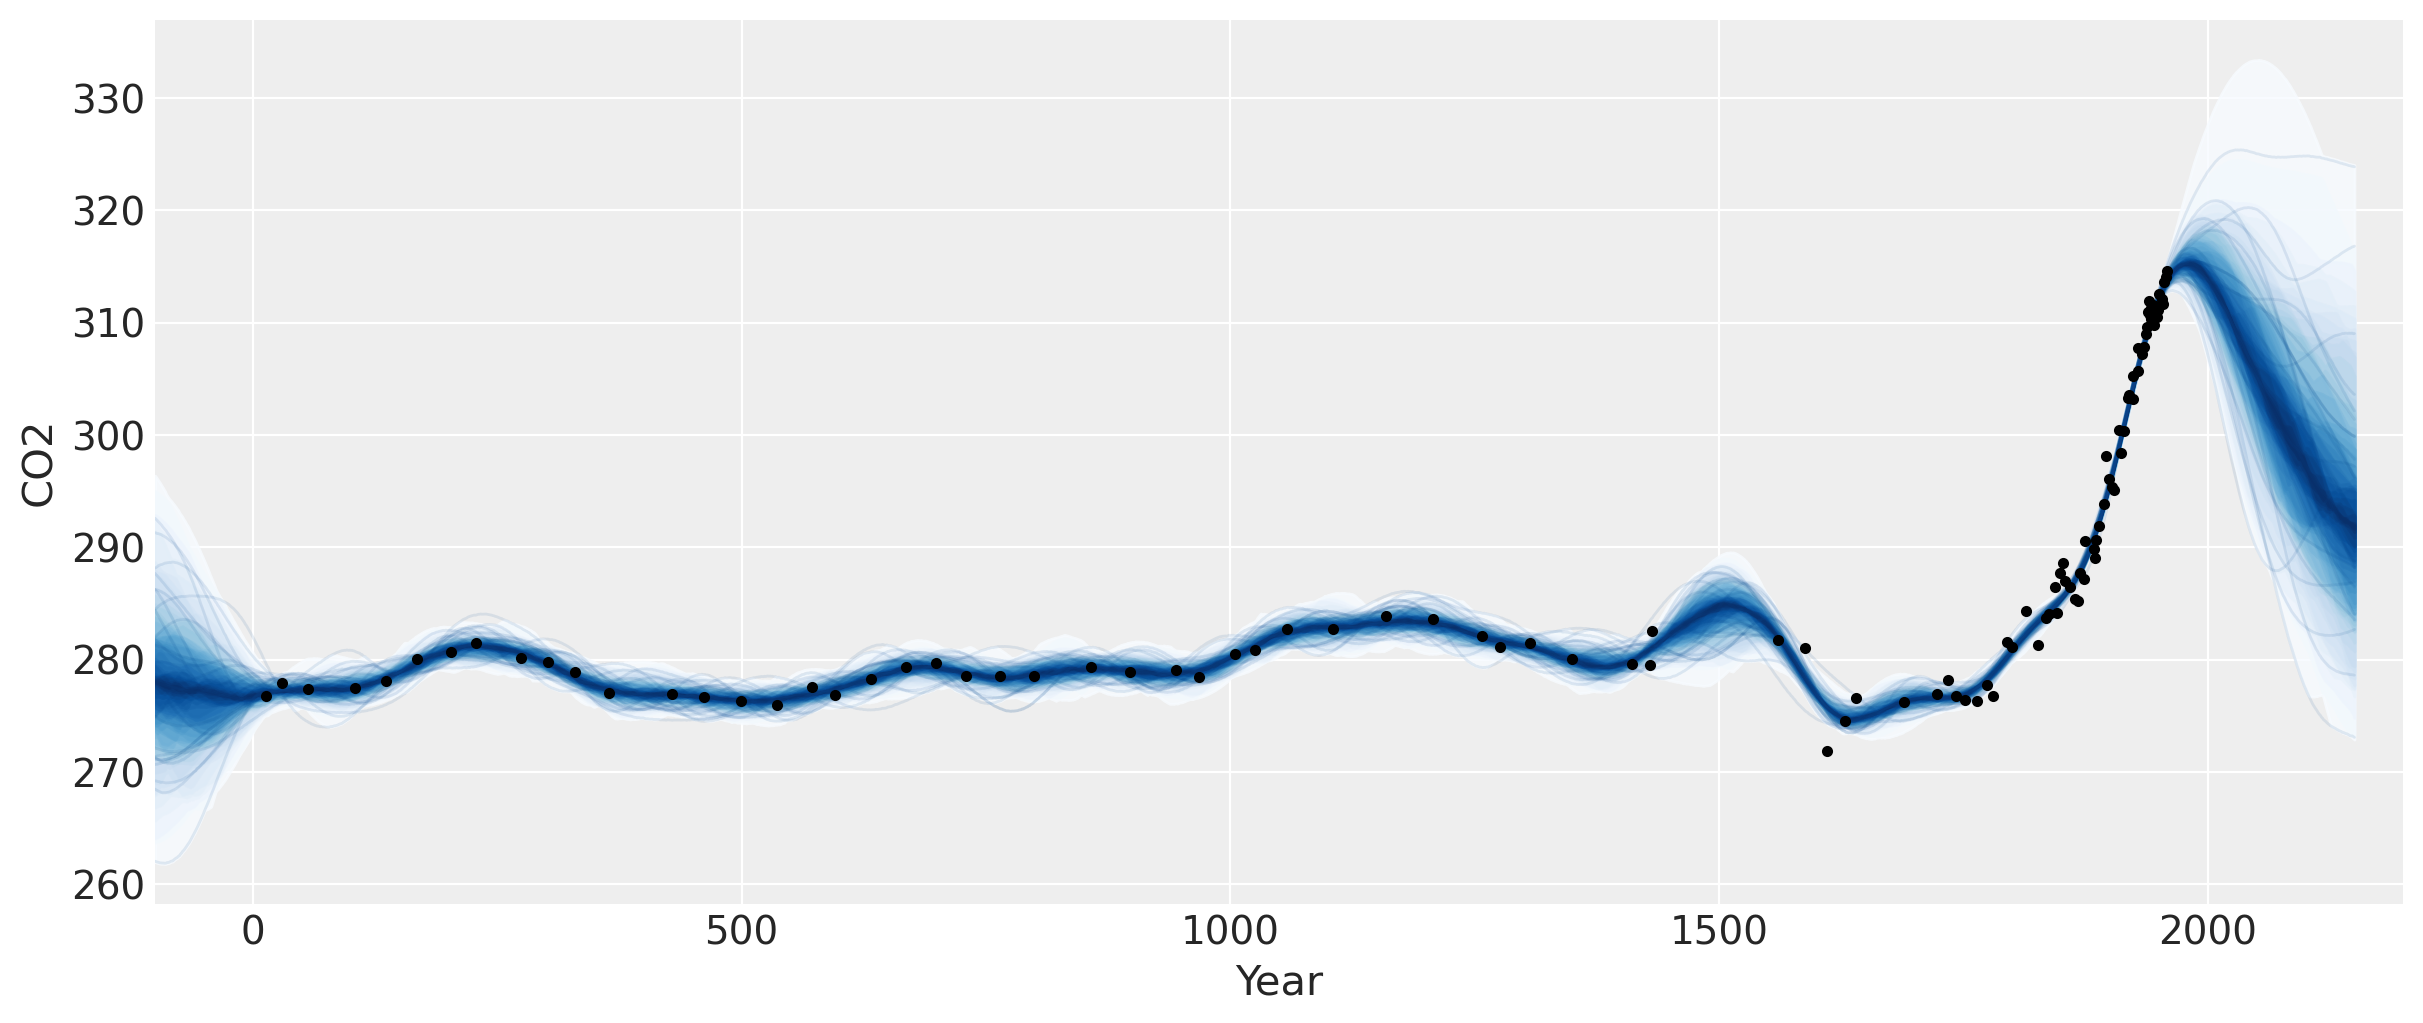

My favorite graph from the article is the one showing the GP distribution over the CO₂ levels based on the year, the sixth image. It overlays the observed measurements with the GP’s predicted mean. I like it because it captures both the trend in the data and the model's uncertainty. I also like how they were able to relate the jump in CO₂ to the industrial revolution. And also I just like the blue color to be honest. One thing to note is that at the end of the graph it doesn't predict it well at all as it is saying CO₂ levels will go down which isn't realistic at all. I also want to show a different graph I liked as well.

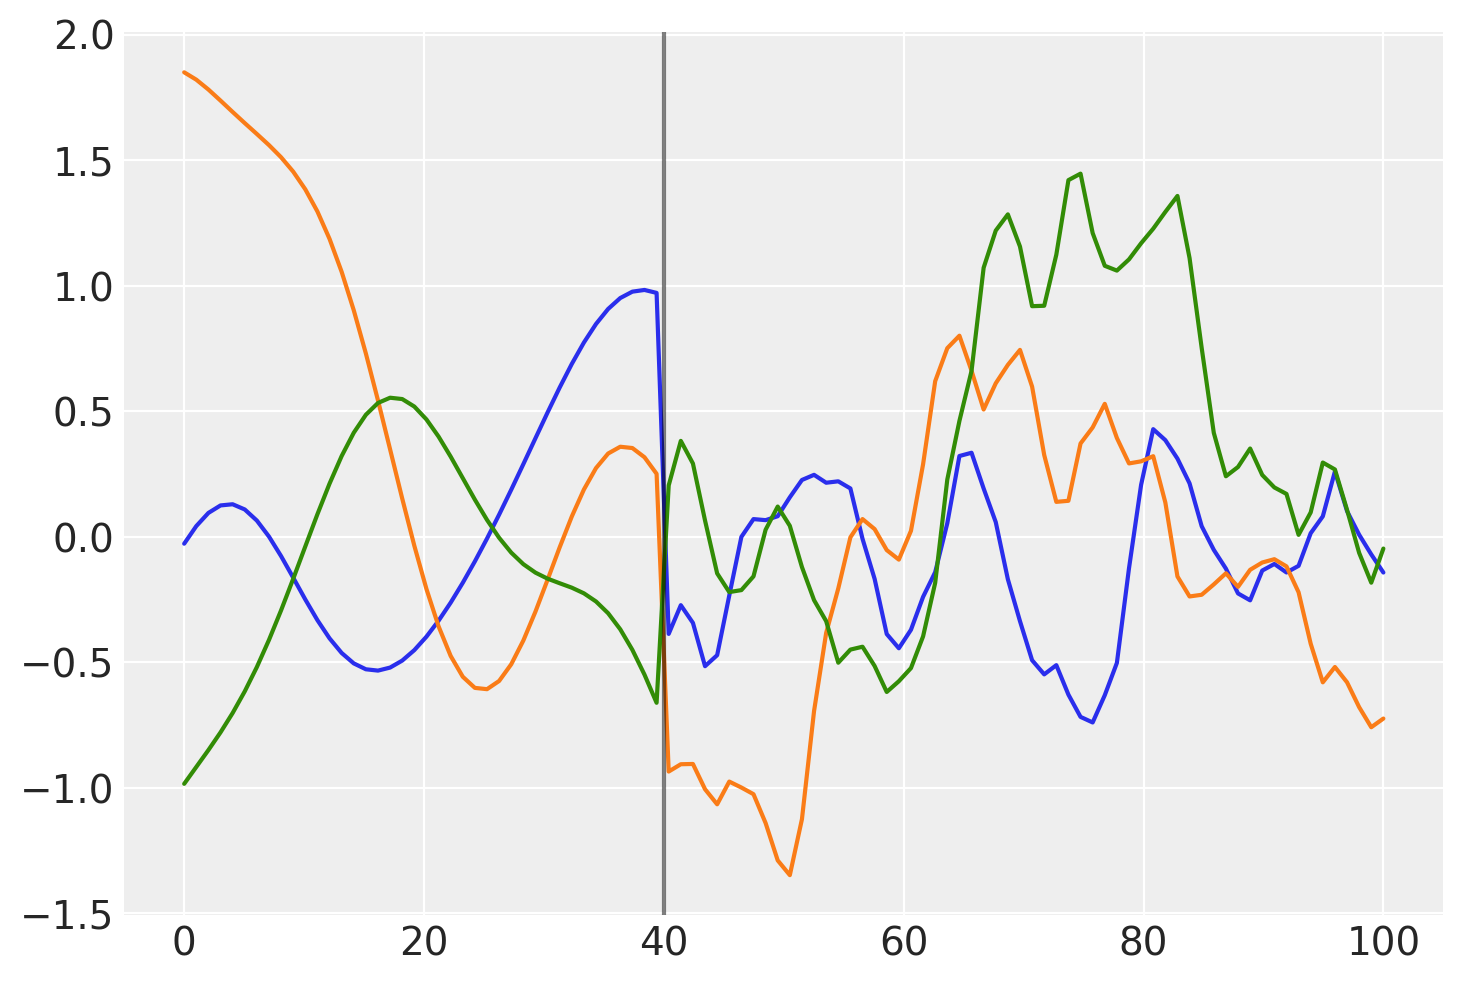

I find this graph interesting because you can see how the graph changes at the changepoint. How it goes from well, nice and smooth to being really rough.